In [1]:
import pandas as pd


In [2]:
p1=pd.read_csv('presidents_one.csv') #Kaggle has a database of information on presidential clemency (pardons, etc.)

In [3]:
p2=pd.read_csv('presidents_two.csv')

In [4]:
p1.columns

Index(['President', 'Fiscal Year', 'Petitions Pending', 'Petitions Received',
       'Petitions Granted', 'Pardons', 'Commutations', 'Respites',
       'Remissions', 'Petitions Denied',
       'Petitions Closed Without Presidential Action',
       'Petitions Denied or Closed Without Presidential Action'],
      dtype='object')

In [5]:
p2.columns

Index(['President', 'Fiscal Year', 'Petitions Pending (Pardons)',
       'Petitions Pending (Commutations)', 'Petitions Received (Pardons)',
       'Petitions Received (Commutations)', 'Petitions Granted', 'Pardons',
       'Commutations', 'Remissions', 'Petitions Denied (Pardons)',
       'Petitions Denied (Commutations)',
       'Petitions Closed Without Presidential Action (Pardons)',
       'Petitions Closed Without Presidential Action (Commutations)',
       'Petitions Denied or Closed Without Presidential Action (Pardons)',
       'Petitions Denied or Closed Without Presidential Action (Commutations)'],
      dtype='object')

In [6]:
p1[:5]

,President,Fiscal Year,Petitions Pending,Petitions Received,Petitions Granted,Pardons,Commutations,Respites,Remissions,Petitions Denied,Petitions Closed Without Presidential Action,Petitions Denied or Closed Without Presidential Action
0,William McKinley,1900,68,677,220,129,73,4.0,14,131.0,332.0,NaN
1,William McKinley,1901,45,796,226,162,50,2.0,12,117.0,448.0,NaN
2,Theodore Roosevelt,1902,50,738,134,92,36,0.0,6,181.0,366.0,NaN
3,Theodore Roosevelt,1903,107,543,134,70,57,0.0,7,131.0,316.0,NaN
4,Theodore Roosevelt,1904,69,585,162,87,62,2.0,11,122.0,278.0,NaN


In [7]:
p2[:5]

,President,Fiscal Year,Petitions Pending (Pardons),Petitions Pending (Commutations),Petitions Received (Pardons),Petitions Received (Commutations),Petitions Granted,Pardons,Commutations,Remissions,Petitions Denied (Pardons),Petitions Denied (Commutations),Petitions Closed Without Presidential Action (Pardons),Petitions Closed Without Presidential Action (Commutations),Petitions Denied or Closed Without Presidential Action (Pardons),Petitions Denied or Closed Without Presidential Action (Commutations)
0,Lyndon B. Johnson,1967,532,109,419.0,444.0,245,222,23,0,NaN,NaN,NaN,NaN,147.0,373.0
1,Lyndon B. Johnson,1968,582,157,409.0,340.0,16,13,3,0,NaN,NaN,NaN,NaN,106.0,309.0
2,Lyndon B. Johnson,1969,872,185,278.0,195.0,0,0,0,0,NaN,NaN,NaN,NaN,129.0,196.0
3,Richard M. Nixon,1969,1021,184,136.0,115.0,0,0,0,0,NaN,NaN,NaN,NaN,123.0,57.0
4,Richard M. Nixon,1970,1034,242,337.0,122.0,96,82,14,0,NaN,NaN,NaN,NaN,432.0,266.0


In [8]:
#Note that 'petitions granted' is a sum of pardons, commutations, remissions, and (in the case of the early data) respites.

In [9]:
p1null=p1.columns[p1.isnull().any()]
p1[p1null].isnull().sum()

Respites                                                  25
Petitions Denied                                          25
Petitions Closed Without Presidential Action              25
Petitions Denied or Closed Without Presidential Action    46
dtype: int64

In [10]:
p1.shape

(71, 12)

In [11]:
#Note that the 71 rows in p1 include 25 where respites/petitions denied/petitions closed without presidential action are null
#and 46 where petitions denied or closed without presidential action are null

In [12]:
p2null=p2.columns[p2.isnull().any()]
p2[p2null].isnull().sum()

Petitions Received (Pardons)                                              1
Petitions Received (Commutations)                                         1
Petitions Denied (Pardons)                                               13
Petitions Denied (Commutations)                                          13
Petitions Closed Without Presidential Action (Pardons)                   13
Petitions Closed Without Presidential Action (Commutations)              13
Petitions Denied or Closed Without Presidential Action (Pardons)         46
Petitions Denied or Closed Without Presidential Action (Commutations)    46
dtype: int64

In [13]:
p2.shape

(59, 16)

In [14]:
#Likewise, p2's 59 rows include 46 where petitions denied or closed without presidential action (pardons) 
#and petitions denied or closed without presidential action (commutations) are null, and 13 where petitions denied (pardons),
#petitions denied (commutations), petitions closed without presidential action (pardons), and petitions closed without 
#presidential action (commutations) are null. 

In [15]:
#p2 also includes one row where Petitions Received (Pardons) and Petitions Received (Commutations) are null. Why?

In [16]:
p2[p2['Petitions Received (Pardons)'].isnull()]

,President,Fiscal Year,Petitions Pending (Pardons),Petitions Pending (Commutations),Petitions Received (Pardons),Petitions Received (Commutations),Petitions Granted,Pardons,Commutations,Remissions,Petitions Denied (Pardons),Petitions Denied (Commutations),Petitions Closed Without Presidential Action (Pardons),Petitions Closed Without Presidential Action (Commutations),Petitions Denied or Closed Without Presidential Action (Pardons),Petitions Denied or Closed Without Presidential Action (Commutations)
9,Richard M. Nixon,1975,207,49,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0


In [17]:
p2[8:14]

,President,Fiscal Year,Petitions Pending (Pardons),Petitions Pending (Commutations),Petitions Received (Pardons),Petitions Received (Commutations),Petitions Granted,Pardons,Commutations,Remissions,Petitions Denied (Pardons),Petitions Denied (Commutations),Petitions Closed Without Presidential Action (Pardons),Petitions Closed Without Presidential Action (Commutations),Petitions Denied or Closed Without Presidential Action (Pardons),Petitions Denied or Closed Without Presidential Action (Commutations)
8,Richard M. Nixon,1974,312,50,291.0,135.0,195,187,8,0,NaN,NaN,NaN,NaN,209.0,128.0
9,Richard M. Nixon,1975,207,49,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0
10,Gerald R. Ford,1975,207,49,351.0,259.0,156,147,5,4,NaN,NaN,NaN,NaN,166.0,159.0
11,Gerald R. Ford,1976,245,140,502.0,240.0,117,106,11,0,NaN,NaN,NaN,NaN,199.0,243.0
12,Gerald R. Ford,1977,442,126,125.0,50.0,136,129,6,1,NaN,NaN,NaN,NaN,70.0,63.0
13,Jimmy Carter,1977,368,106,292.0,271.0,1,0,1,0,1.0,0.0,118.0,49.0,NaN,NaN


In [18]:
#It appears the reason this row includes no such information is that it does not belong in the table in the first place. Nixon
#resigned in August 1974 and fiscal year 1975 began in October 1974. Therefore although the information is not missing at random, 
#deletion of this essentially spurious entry is more reasonable than imputation.

In [19]:
p2=p2.drop(9,axis=0)
p2[8:14]

,President,Fiscal Year,Petitions Pending (Pardons),Petitions Pending (Commutations),Petitions Received (Pardons),Petitions Received (Commutations),Petitions Granted,Pardons,Commutations,Remissions,Petitions Denied (Pardons),Petitions Denied (Commutations),Petitions Closed Without Presidential Action (Pardons),Petitions Closed Without Presidential Action (Commutations),Petitions Denied or Closed Without Presidential Action (Pardons),Petitions Denied or Closed Without Presidential Action (Commutations)
8,Richard M. Nixon,1974,312,50,291.0,135.0,195,187,8,0,NaN,NaN,NaN,NaN,209.0,128.0
10,Gerald R. Ford,1975,207,49,351.0,259.0,156,147,5,4,NaN,NaN,NaN,NaN,166.0,159.0
11,Gerald R. Ford,1976,245,140,502.0,240.0,117,106,11,0,NaN,NaN,NaN,NaN,199.0,243.0
12,Gerald R. Ford,1977,442,126,125.0,50.0,136,129,6,1,NaN,NaN,NaN,NaN,70.0,63.0
13,Jimmy Carter,1977,368,106,292.0,271.0,1,0,1,0,1.0,0.0,118.0,49.0,NaN,NaN
14,Jimmy Carter,1978,541,327,379.0,262.0,165,162,3,0,307.0,409.0,74.0,46.0,NaN,NaN


In [20]:
p2null=p2.columns[p2.isnull().any()]
p2[p2null].isnull().sum()

Petitions Denied (Pardons)                                               12
Petitions Denied (Commutations)                                          12
Petitions Closed Without Presidential Action (Pardons)                   12
Petitions Closed Without Presidential Action (Commutations)              12
Petitions Denied or Closed Without Presidential Action (Pardons)         46
Petitions Denied or Closed Without Presidential Action (Commutations)    46
dtype: int64

In [21]:
p2.shape

(58, 16)

In [22]:
p1missing1=p1[p1['Petitions Denied'].isnull()]

In [23]:
p1missing1['Petitions Denied or Closed Without Presidential Action'].isnull().sum()

0

In [24]:
#Luckily the rows of p1 for which 1 feature is missing information are just those for which we have the complementary information.

In [25]:
p2missing1=p2[p2['Petitions Denied (Pardons)'].isnull()]

In [26]:
p2missing1['Petitions Denied or Closed Without Presidential Action (Pardons)'].isnull().sum()

0

In [27]:
#And the same fortune holds for p2; we can confirm this by performing similar checks with the other combinations of columns

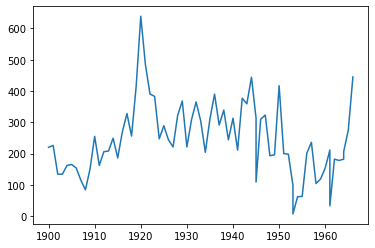

In [28]:
import matplotlib.pyplot as plt
plt.plot(p1['Fiscal Year'],p1['Petitions Granted'])


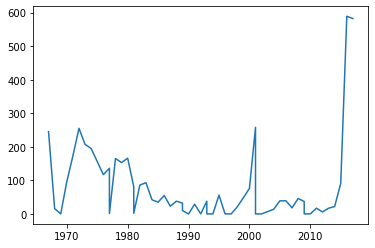

In [29]:
plt.plot(p2['Fiscal Year'],p2['Petitions Granted'])

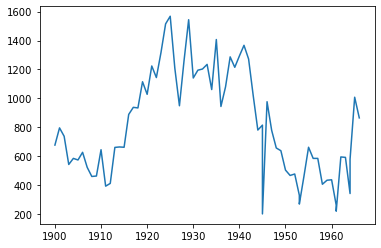

In [30]:
plt.plot(p1['Fiscal Year'],p1['Petitions Received'])

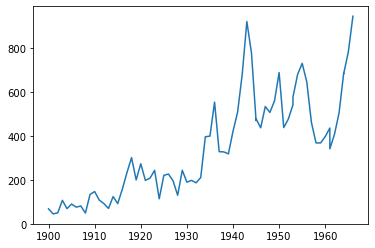

In [31]:
plt.plot(p1['Fiscal Year'],p1['Petitions Pending'])

In [32]:
#Since the total of petitions denied or closed without presidential action is all we have for some rows, this will be one of the
#attributes we extract so that we can compare all years. We already have petitions granted and pardons for all years. Since we do
#not have petitions received for all years, since action is not taken on all petitions, and since there is considerable irregular 
#variability in numbers of petitions granted across years, it makes more sense to look at ratios of petitions granted to sum of 
#petitions granted and petitions denied or closed without presidential action as our initial response variable

In [33]:
import numpy as np
p1['Petitions Denied or Closed Without Presidential Action']=p1['Petitions Denied or Closed Without Presidential Action'].replace(np.nan,p1['Petitions Denied']+p1['Petitions Closed Without Presidential Action'])

In [34]:
p1[:5]

,President,Fiscal Year,Petitions Pending,Petitions Received,Petitions Granted,Pardons,Commutations,Respites,Remissions,Petitions Denied,Petitions Closed Without Presidential Action,Petitions Denied or Closed Without Presidential Action
0,William McKinley,1900,68,677,220,129,73,4.0,14,131.0,332.0,463.0
1,William McKinley,1901,45,796,226,162,50,2.0,12,117.0,448.0,565.0
2,Theodore Roosevelt,1902,50,738,134,92,36,0.0,6,181.0,366.0,547.0
3,Theodore Roosevelt,1903,107,543,134,70,57,0.0,7,131.0,316.0,447.0
4,Theodore Roosevelt,1904,69,585,162,87,62,2.0,11,122.0,278.0,400.0


In [35]:
p1[-5:]

,President,Fiscal Year,Petitions Pending,Petitions Received,Petitions Granted,Pardons,Commutations,Respites,Remissions,Petitions Denied,Petitions Closed Without Presidential Action,Petitions Denied or Closed Without Presidential Action
66,John F. Kennedy,1963,506,592,178,133,43,NaN,2,NaN,NaN,233.0
67,John F. Kennedy,1964,687,342,182,149,32,NaN,1,NaN,NaN,162.0
68,Lyndon B. Johnson,1964,685,579,206,166,40,NaN,0,NaN,NaN,275.0
69,Lyndon B. Johnson,1965,783,1008,275,195,80,NaN,0,NaN,NaN,569.0
70,Lyndon B. Johnson,1966,947,865,445,364,80,NaN,1,NaN,NaN,726.0


In [36]:
p1=p1.rename(columns={'Petitions Denied or Closed Without Presidential Action':'Rejected'}) #because column name is cumbersome

In [37]:
p1[:5]

,President,Fiscal Year,Petitions Pending,Petitions Received,Petitions Granted,Pardons,Commutations,Respites,Remissions,Petitions Denied,Petitions Closed Without Presidential Action,Rejected
0,William McKinley,1900,68,677,220,129,73,4.0,14,131.0,332.0,463.0
1,William McKinley,1901,45,796,226,162,50,2.0,12,117.0,448.0,565.0
2,Theodore Roosevelt,1902,50,738,134,92,36,0.0,6,181.0,366.0,547.0
3,Theodore Roosevelt,1903,107,543,134,70,57,0.0,7,131.0,316.0,447.0
4,Theodore Roosevelt,1904,69,585,162,87,62,2.0,11,122.0,278.0,400.0


In [38]:
p2.columns.get_loc('Petitions Denied (Pardons)') #Since the column names are cumbersome and to avoid off by 1 error when counting manually

10

In [39]:
testcol=p2.iloc[:,10]

In [40]:
testcol[-5:]

54    314.0
55    154.0
56    142.0
57      0.0
58      0.0
Name: Petitions Denied (Pardons), dtype: float64

In [41]:
testcol[:5]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Petitions Denied (Pardons), dtype: float64

In [42]:
testcol=testcol.replace(np.nan,0) #to avoid getting not a number error when adding to numerical values; this will not change
                #results since 0 is the additive identity and all we want is the sum of non-null values

In [43]:
idx=11
while idx<16:
    p2.iloc[:,idx]=p2.iloc[:,idx].replace(np.nan,0)
    testcol+=p2.iloc[:,idx]
    idx+=1

In [44]:
testcol[:5] #as desired the values are the sum of the non-null values in the 6 rightmost columns 

0    520.0
1    415.0
2    325.0
3    180.0
4    698.0
Name: Petitions Denied (Pardons), dtype: float64

In [45]:
p2[:5]

,President,Fiscal Year,Petitions Pending (Pardons),Petitions Pending (Commutations),Petitions Received (Pardons),Petitions Received (Commutations),Petitions Granted,Pardons,Commutations,Remissions,Petitions Denied (Pardons),Petitions Denied (Commutations),Petitions Closed Without Presidential Action (Pardons),Petitions Closed Without Presidential Action (Commutations),Petitions Denied or Closed Without Presidential Action (Pardons),Petitions Denied or Closed Without Presidential Action (Commutations)
0,Lyndon B. Johnson,1967,532,109,419.0,444.0,245,222,23,0,NaN,0.0,0.0,0.0,147.0,373.0
1,Lyndon B. Johnson,1968,582,157,409.0,340.0,16,13,3,0,NaN,0.0,0.0,0.0,106.0,309.0
2,Lyndon B. Johnson,1969,872,185,278.0,195.0,0,0,0,0,NaN,0.0,0.0,0.0,129.0,196.0
3,Richard M. Nixon,1969,1021,184,136.0,115.0,0,0,0,0,NaN,0.0,0.0,0.0,123.0,57.0
4,Richard M. Nixon,1970,1034,242,337.0,122.0,96,82,14,0,NaN,0.0,0.0,0.0,432.0,266.0


In [46]:
testcol[-5:]

54    2175.0
55    1638.0
56    1845.0
57    8241.0
58     773.0
Name: Petitions Denied (Pardons), dtype: float64

In [47]:
p2[-5:]

,President,Fiscal Year,Petitions Pending (Pardons),Petitions Pending (Commutations),Petitions Received (Pardons),Petitions Received (Commutations),Petitions Granted,Pardons,Commutations,Remissions,Petitions Denied (Pardons),Petitions Denied (Commutations),Petitions Closed Without Presidential Action (Pardons),Petitions Closed Without Presidential Action (Commutations),Petitions Denied or Closed Without Presidential Action (Pardons),Petitions Denied or Closed Without Presidential Action (Commutations)
54,Barack Obama,2013,826,2232,303.0,2370.0,17,17,0,0,314.0,1577.0,44.0,240.0,0.0,0.0
55,Barack Obama,2014,754,2785,273.0,6561.0,22,13,9,0,154.0,1226.0,36.0,222.0,0.0,0.0
56,Barack Obama,2015,824,7889,294.0,2999.0,91,12,79,0,142.0,782.0,6.0,915.0,0.0,0.0
57,Barack Obama,2016,958,9115,998.0,11028.0,589,6,583,0,0.0,6507.0,34.0,1700.0,0.0,0.0
58,Barack Obama,2017,1920,11355,317.0,3473.0,582,78,504,0,0.0,600.0,5.0,168.0,0.0,0.0


In [48]:
p2['Rejected']=testcol

In [49]:
p2[:5]

,President,Fiscal Year,Petitions Pending (Pardons),Petitions Pending (Commutations),Petitions Received (Pardons),Petitions Received (Commutations),Petitions Granted,Pardons,Commutations,Remissions,Petitions Denied (Pardons),Petitions Denied (Commutations),Petitions Closed Without Presidential Action (Pardons),Petitions Closed Without Presidential Action (Commutations),Petitions Denied or Closed Without Presidential Action (Pardons),Petitions Denied or Closed Without Presidential Action (Commutations),Rejected
0,Lyndon B. Johnson,1967,532,109,419.0,444.0,245,222,23,0,NaN,0.0,0.0,0.0,147.0,373.0,520.0
1,Lyndon B. Johnson,1968,582,157,409.0,340.0,16,13,3,0,NaN,0.0,0.0,0.0,106.0,309.0,415.0
2,Lyndon B. Johnson,1969,872,185,278.0,195.0,0,0,0,0,NaN,0.0,0.0,0.0,129.0,196.0,325.0
3,Richard M. Nixon,1969,1021,184,136.0,115.0,0,0,0,0,NaN,0.0,0.0,0.0,123.0,57.0,180.0
4,Richard M. Nixon,1970,1034,242,337.0,122.0,96,82,14,0,NaN,0.0,0.0,0.0,432.0,266.0,698.0


In [50]:
p1.columns.get_loc('Petitions Granted')

4

In [51]:
p1['Resolved']=p1.iloc[:,4]+p1['Rejected']

In [52]:
p1[:5]

,President,Fiscal Year,Petitions Pending,Petitions Received,Petitions Granted,Pardons,Commutations,Respites,Remissions,Petitions Denied,Petitions Closed Without Presidential Action,Rejected,Resolved
0,William McKinley,1900,68,677,220,129,73,4.0,14,131.0,332.0,463.0,683.0
1,William McKinley,1901,45,796,226,162,50,2.0,12,117.0,448.0,565.0,791.0
2,Theodore Roosevelt,1902,50,738,134,92,36,0.0,6,181.0,366.0,547.0,681.0
3,Theodore Roosevelt,1903,107,543,134,70,57,0.0,7,131.0,316.0,447.0,581.0
4,Theodore Roosevelt,1904,69,585,162,87,62,2.0,11,122.0,278.0,400.0,562.0


In [53]:
p2.columns.get_loc('Petitions Granted')

6

In [54]:
p2['Resolved']=p2.iloc[:,6]+p2['Rejected']

In [55]:
p2[:5]

,President,Fiscal Year,Petitions Pending (Pardons),Petitions Pending (Commutations),Petitions Received (Pardons),Petitions Received (Commutations),Petitions Granted,Pardons,Commutations,Remissions,Petitions Denied (Pardons),Petitions Denied (Commutations),Petitions Closed Without Presidential Action (Pardons),Petitions Closed Without Presidential Action (Commutations),Petitions Denied or Closed Without Presidential Action (Pardons),Petitions Denied or Closed Without Presidential Action (Commutations),Rejected,Resolved
0,Lyndon B. Johnson,1967,532,109,419.0,444.0,245,222,23,0,NaN,0.0,0.0,0.0,147.0,373.0,520.0,765.0
1,Lyndon B. Johnson,1968,582,157,409.0,340.0,16,13,3,0,NaN,0.0,0.0,0.0,106.0,309.0,415.0,431.0
2,Lyndon B. Johnson,1969,872,185,278.0,195.0,0,0,0,0,NaN,0.0,0.0,0.0,129.0,196.0,325.0,325.0
3,Richard M. Nixon,1969,1021,184,136.0,115.0,0,0,0,0,NaN,0.0,0.0,0.0,123.0,57.0,180.0,180.0
4,Richard M. Nixon,1970,1034,242,337.0,122.0,96,82,14,0,NaN,0.0,0.0,0.0,432.0,266.0,698.0,794.0


In [56]:
p1['%Granted']=100*p1.iloc[:,4]/p1['Resolved'] #returns float as it should

In [57]:
p1[:5]

,President,Fiscal Year,Petitions Pending,Petitions Received,Petitions Granted,Pardons,Commutations,Respites,Remissions,Petitions Denied,Petitions Closed Without Presidential Action,Rejected,Resolved,%Granted
0,William McKinley,1900,68,677,220,129,73,4.0,14,131.0,332.0,463.0,683.0,32.210835
1,William McKinley,1901,45,796,226,162,50,2.0,12,117.0,448.0,565.0,791.0,28.571429
2,Theodore Roosevelt,1902,50,738,134,92,36,0.0,6,181.0,366.0,547.0,681.0,19.676946
3,Theodore Roosevelt,1903,107,543,134,70,57,0.0,7,131.0,316.0,447.0,581.0,23.063683
4,Theodore Roosevelt,1904,69,585,162,87,62,2.0,11,122.0,278.0,400.0,562.0,28.825623


In [58]:
p2['%Granted']=100*p2.iloc[:,6]/p2['Resolved']

In [59]:
p2['%Granted']

0     32.026144
1      3.712297
2      0.000000
3      0.000000
4     12.090680
5     21.071864
6     38.345865
7     37.773723
8     36.654135
10    32.432432
11    20.930233
12    50.557621
13     0.591716
14    16.483516
15    25.457571
16    25.000000
17    43.315508
18     1.290323
19    13.586098
20    23.308271
21    11.413043
22    11.146497
23    15.942029
24     6.886228
25     7.102804
26    25.196850
27     3.257329
28     0.000000
29     4.084507
30     0.000000
31    19.000000
32     0.000000
33     0.000000
34     8.695652
35     0.000000
36     0.000000
37     5.263158
38     7.395994
39     6.890299
40    61.722488
41     0.000000
42     0.000000
43     0.662252
44     1.437372
45     4.482759
46     2.706454
47     4.195804
48     1.433915
49     2.411995
50     0.000000
51     0.000000
52     0.380654
53     0.578035
54     0.775547
55     1.325301
56     4.700413
57     6.670442
58    42.952030
Name: %Granted, dtype: float64

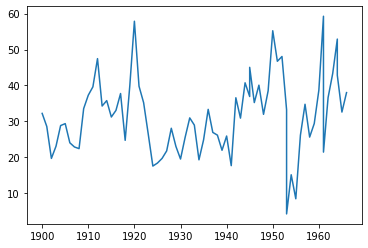

In [60]:
plt.plot(p1['Fiscal Year'],p1['%Granted'])

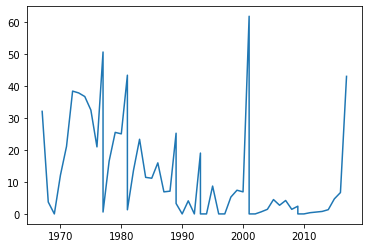

In [61]:
plt.plot(p2['Fiscal Year'],p2['%Granted']) 

In [62]:
#We are interested in finding a good splitting point between "early" and "late" data. We do this by maximizing standard deviation
#loss for subsets split at the various possible dates, or in other words minimizes the summed product of the standard deviation of 
#each subset and the proportion of rows in that subset

In [63]:
X=pd.merge(p1['Fiscal Year'],p2['Fiscal Year'],how='outer')

In [64]:
X[:5]

,Fiscal Year
0,1900
1,1901
2,1902
3,1903
4,1904


In [65]:
X['%Granted']=pd.merge(p1['%Granted'],p2['%Granted'],how='outer')

In [66]:
X[:5]

,Fiscal Year,%Granted
0,1900,32.210835
1,1901,28.571429
2,1902,19.676946
3,1903,23.063683
4,1904,28.825623


In [67]:
X[-5:]

,Fiscal Year,%Granted
124,2013,0.775547
125,2014,1.325301
126,2015,4.700413
127,2016,6.670442
128,2017,42.952030


In [68]:
STDsums=[]
split=0
while split<117:
    subset1=X[X['Fiscal Year']<split+1900.5]['%Granted']
    subset2=X[X['Fiscal Year']>split+1900.5]['%Granted']
    STDsums.append(np.std(subset1)*np.size(subset1)/129+np.std(subset2)*np.size(subset2)/129)
    split+=1

In [69]:
STDsums[:5]

[15.993092264773315,
 15.950567706775374,
 15.979753171412051,
 15.944343865267296,
 15.896014972812234]

In [70]:
#Checking the calculation for split at 1904.5
subset1=X['%Granted'][:5]
subset1

0    32.210835
1    28.571429
2    19.676946
3    23.063683
4    28.825623
Name: %Granted, dtype: float64

In [71]:
subset2=X['%Granted'][5:]
subset2[:5]

5    29.359431
6    24.024961
7    22.862823
8    22.400000
9    33.555556
Name: %Granted, dtype: float64

In [72]:
X[:10]

,Fiscal Year,%Granted
0,1900,32.210835
1,1901,28.571429
2,1902,19.676946
3,1903,23.063683
4,1904,28.825623
5,1905,29.359431
6,1906,24.024961
7,1907,22.862823
8,1908,22.400000
9,1909,33.555556


In [73]:
np.std(subset1)*5/129+np.std(subset2)*124/129

15.896014972812234

In [74]:
STDsums[:5]

[15.993092264773315,
 15.950567706775374,
 15.979753171412051,
 15.944343865267296,
 15.896014972812234]

In [75]:
np.argmin(STDsums)

67

In [76]:
#It seems that splitting right after 1967 produces the two most homogeneous subsets.

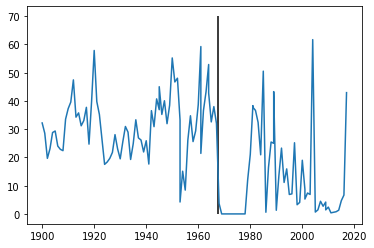

In [77]:
plt.plot(X['Fiscal Year'],X['%Granted']) #Visual representation of this split
plt.vlines(1967.5,0,70)

In [78]:
STDsums[67] 

12.527626597832356

In [79]:
np.std(X['%Granted'])

16.07680232030623

In [80]:
(16.077-12.528)/.16077 #percentage STD loss

22.075013995148357

In [81]:
np.std(X[X['Fiscal Year']<1967.5]['%Granted'])

10.60513312197294

In [82]:
np.std(X[X['Fiscal Year']>1967.5]['%Granted'])

14.956039409444248

In [83]:
#How much more intra-subset variability is reduced if we split the more variable subset again at an optimal point?
Xreduced=X[X['Fiscal Year']>1967.5]
np.size(Xreduced['Fiscal Year'])


57

In [84]:
STDsums=[]
split=0
while split<40:
    subset1=Xreduced[Xreduced['Fiscal Year']<split+1968.5]['%Granted']
    subset2=Xreduced[Xreduced['Fiscal Year']>split+1968.5]['%Granted']
    STDsums.append(np.std(subset1)*np.size(subset1)/57+np.std(subset2)*np.size(subset2)/57)
    split+=1

In [85]:
np.argmin(STDsums)

10

In [86]:
STDsums[10]

12.157747985488184

In [87]:
(14.956-12.158)/.14956 #percentage STD loss if we split again at 1978.5

18.708210751537845

In [88]:
np.std(Xreduced[Xreduced['Fiscal Year']<1978.5]['%Granted'])

0.9892133828699635

In [89]:
np.std(Xreduced[Xreduced['Fiscal Year']>1978.5]['%Granted']) #We get a standard deviation for the post-1978 subset that is
            #higher than for the whole post-1967 subset and nearly as high as for the entire dataset. This is possible because
            #the post-1978 subset contains comparatively more outliers while the 1968-1978 data adds more points that are all 
            #close to the 1967-2017 mean ... similarly [0,1] has a higher standard deviation than [0,1,1]

15.457542299898114

In [90]:
#Since we would have to split the post-1978 subset again to justify splitting the post-1967 subset, perhaps it makes since to
#divide the data by date only once. Even here, the percent that variability as measured by standard deviation is reduced is
#fairly small.

In [91]:
#It does appear that intra-subset variability is reduced slightly by splitting after 1967 (very close, by the way, to where the 
#original data were split into files), although it still remains substantial. Anyway, it is one way we can make sense of date 
#as an independent variable. Another is using the 4-year election cycle to group it into congruence classes mod 4. 
#Since there are 2 classes for early/late, we can use a Boolean as we set up a training data matrix; but since we have 4 
#congruence classes, it makes more sense to use one-hot encoding to encapsulate date information here.

In [92]:
X['Early']=X['Fiscal Year']<1967.5
X[:5]

,Fiscal Year,%Granted,Early
0,1900,32.210835,True
1,1901,28.571429,True
2,1902,19.676946,True
3,1903,23.063683,True
4,1904,28.825623,True


In [93]:
X[-5:]

,Fiscal Year,%Granted,Early
124,2013,0.775547,False
125,2014,1.325301,False
126,2015,4.700413,False
127,2016,6.670442,False
128,2017,42.952030,False


In [94]:
X['y0']=X['Fiscal Year']%4==0
X['y1']=X['Fiscal Year']%4==1
X['y2']=X['Fiscal Year']%4==2
X['y3']=X['Fiscal Year']%4==3

In [95]:
X[:5]

,Fiscal Year,%Granted,Early,y0,y1,y2,y3
0,1900,32.210835,True,True,False,False,False
1,1901,28.571429,True,False,True,False,False
2,1902,19.676946,True,False,False,True,False
3,1903,23.063683,True,False,False,False,True
4,1904,28.825623,True,True,False,False,False


{'whiskers': [<matplotlib.lines.Line2D at 0x1d1352bdf10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1352ca610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1352bdbb0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d1352cacd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d1352d3370>,
 'means': [<matplotlib.lines.Line2D at 0x1d1352cafd0>,
  <matplotlib.lines.Line2D at 0x1d135309280>]}

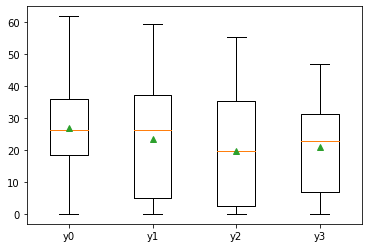

In [96]:
#Visualizing whether the congruence class is meaningful wrt to the value of %Granted
plt.boxplot([X.loc[X['y0']]['%Granted'].to_numpy(),X.loc[X['y1']]['%Granted'].to_numpy(),X.loc[X['y2']]['%Granted'].to_numpy(),X.loc[X['y3']]['%Granted'].to_numpy()],labels=['y0','y1','y2','y3'],showmeans=True)

In [97]:
#There does seem to be considerable regular variation along with 
#considerable outliers for each subset. Numerically we can look at mean/standard deviation and median/interquartile range
import scipy
import scipy.stats
for i in ['y0','y1','y2','y3']:
    print(i,np.mean(X.loc[X[i]]['%Granted']),np.std(X.loc[X[i]]['%Granted']),np.median(X.loc[X[i]]['%Granted']),scipy.stats.iqr(X.loc[X[i]]['%Granted']))

y0 26.8135243338853 16.827726214832655 26.137841352405722 17.742093516826557
y1 23.272194364844456 16.669706404838927 26.058184678811543 32.117331217111804
y2 19.792431515568833 15.447480135414374 19.676945668135094 32.815277942396584
y3 21.03586585887176 13.979685607856501 22.86282306163022 24.31775450723165


In [98]:
#One way to use the president's identity as an independent variable is to condition on political party. As with the early/late 
#split, since this is a binary variable we deliberately avoid one-hot encoding in order not to introduce additional correlation 
#into our set and increase computational expense. Since there are fewer Democrats represented in the data than Republicans,
#it will probably be easiest to use 'Dem' as a Boolean variable (true if the president is a Democrat, false otherwise).

In [99]:
X['President']=pd.merge(p1['President'],p2['President'],how='outer')

In [100]:
X['President'].unique() #Aren't we lucky to have such a nice clean dataset, e.g., not one entry for 'Harry Truman' and another
#for 'Harry S. Truman' and another for 'Harry S Truman'? Thanks, Kaggle!

array(['William McKinley', 'Theodore Roosevelt', 'William H. Taft',
       'Woodrow Wilson', 'Warren Harding', 'Calvin Coolidge',
       'Herbert Hoover', 'Franklin D. Roosevelt', 'Harry S. Truman',
       'Dwight D. Eisenhower', 'John F. Kennedy', 'Lyndon B. Johnson',
       'Richard M. Nixon', 'Gerald R. Ford', 'Jimmy Carter',
       'Ronald Reagan', 'George H.W. Bush', 'William J. Clinton',
       'George W. Bush', 'Barack Obama'], dtype=object)

In [101]:
Dems={'Woodrow Wilson','Franklin D. Roosevelt','Harry S. Truman','John F. Kennedy','Lyndon B. Johnson','Jimmy Carter',
     'William J. Clinton','Barack Obama'}
'Barack Obama' in Dems

True

In [102]:
'William McKinley' in Dems

False

In [103]:
X['Dem']=X['President'].isin(Dems)

In [104]:
X[:5]

,Fiscal Year,%Granted,Early,y0,y1,y2,y3,President,Dem
0,1900,32.210835,True,True,False,False,False,William McKinley,False
1,1901,28.571429,True,False,True,False,False,William McKinley,False
2,1902,19.676946,True,False,False,True,False,Theodore Roosevelt,False
3,1903,23.063683,True,False,False,False,True,Theodore Roosevelt,False
4,1904,28.825623,True,True,False,False,False,Theodore Roosevelt,False


In [105]:
X[-5:]

,Fiscal Year,%Granted,Early,y0,y1,y2,y3,President,Dem
124,2013,0.775547,False,False,True,False,False,Barack Obama,True
125,2014,1.325301,False,False,False,True,False,Barack Obama,True
126,2015,4.700413,False,False,False,False,True,Barack Obama,True
127,2016,6.670442,False,True,False,False,False,Barack Obama,True
128,2017,42.952030,False,False,True,False,False,Barack Obama,True


In [106]:
X[90:95]

,Fiscal Year,%Granted,Early,y0,y1,y2,y3,President,Dem
90,1983,32.432432,False,False,False,False,True,Jimmy Carter,True
91,1984,20.930233,False,True,False,False,False,Ronald Reagan,False
92,1985,50.557621,False,False,True,False,False,Ronald Reagan,False
93,1986,0.591716,False,False,False,True,False,Ronald Reagan,False
94,1987,16.483516,False,False,False,False,True,Ronald Reagan,False


{'whiskers': [<matplotlib.lines.Line2D at 0x1d136ffbc40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d137009340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d136ffb8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d137009a00>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d1370140a0>,
 'means': [<matplotlib.lines.Line2D at 0x1d137009d00>,
  <matplotlib.lines.Line2D at 0x1d13701f880>]}

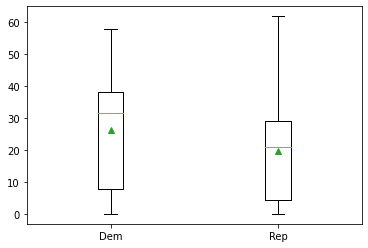

In [107]:
#more visualization
plt.boxplot([X.loc[X['Dem']]['%Granted'].to_numpy(),X.loc[X['Dem']==False]['%Granted'].to_numpy()],labels=['Dem','Rep'],showmeans=True)

In [108]:
print('Dem',np.mean(X.loc[X['Dem']]['%Granted']),np.std(X.loc[X['Dem']]['%Granted']),np.median(X.loc[X['Dem']]['%Granted']),scipy.stats.iqr(X.loc[X['Dem']]['%Granted']))
print('Rep',np.mean(X.loc[X['Dem']==False]['%Granted']),np.std(X.loc[X['Dem']==False]['%Granted']),np.median(X.loc[X['Dem']==False]['%Granted']),scipy.stats.iqr(X.loc[X['Dem']==False]['%Granted']))
#Mean, STD, Median, Interquartile Range

Dem 26.270809641889134 16.170333869739395 31.580848037690565 30.22380319239967
Rep 19.661753059789152 15.31924352386025 20.930232558139537 24.68266603124897


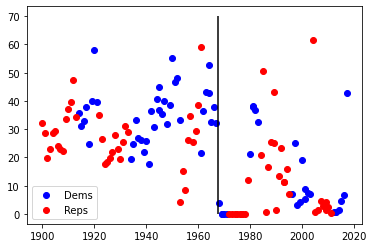

In [109]:
plt.scatter(X.loc[X['Dem']]['Fiscal Year'],X.loc[X['Dem']]['%Granted'],c='b',label='Dems')
plt.scatter(X.loc[X['Dem']==False]['Fiscal Year'],X.loc[X['Dem']==False]['%Granted'],c='r',label='Reps')
plt.vlines(1967.5,0,70) #splitting into 'early' and 'late' data
plt.legend(loc='lower left')

In [110]:
#It appears that the proportion granted clemency as opposed to denied or closed is noticeably higher on average for Democrats in 
#the earlier data, quite a bit less so after 1967. Perhaps then it makes more sense to combine date/party into a 4-way categorization
#scheme using the same sort of one-hot encoding used for the years.

In [111]:
X['EarlyDem']=X['Dem'] & X['Early']
X['LateRep']=(X['Dem'] | X['Early'])==False
X['EarlyRep']=X['Early'] > X['Dem']
X['LateDem']=X['Dem'] > X['Early']

In [112]:
X[:15] #making sure the code executed as intended

,Fiscal Year,%Granted,Early,y0,y1,y2,y3,President,Dem,EarlyDem,LateRep,EarlyRep,LateDem
0,1900,32.210835,True,True,False,False,False,William McKinley,False,False,False,True,False
1,1901,28.571429,True,False,True,False,False,William McKinley,False,False,False,True,False
2,1902,19.676946,True,False,False,True,False,Theodore Roosevelt,False,False,False,True,False
3,1903,23.063683,True,False,False,False,True,Theodore Roosevelt,False,False,False,True,False
4,1904,28.825623,True,True,False,False,False,Theodore Roosevelt,False,False,False,True,False
5,1905,29.359431,True,False,True,False,False,Theodore Roosevelt,False,False,False,True,False
6,1906,24.024961,True,False,False,True,False,Theodore Roosevelt,False,False,False,True,False
7,1907,22.862823,True,False,False,False,True,Theodore Roosevelt,False,False,False,True,False
8,1908,22.400000,True,True,False,False,False,Theodore Roosevelt,False,False,False,True,False
9,1909,33.555556,True,False,True,False,False,Theodore Roosevelt,False,False,False,True,False


In [113]:
X[-15:]

,Fiscal Year,%Granted,Early,y0,y1,y2,y3,President,Dem,EarlyDem,LateRep,EarlyRep,LateDem
114,2004,61.722488,False,True,False,False,False,George W. Bush,False,False,True,False,False
115,2005,0.662252,False,False,True,False,False,George W. Bush,False,False,True,False,False
116,2006,1.437372,False,False,False,True,False,George W. Bush,False,False,True,False,False
117,2007,4.482759,False,False,False,False,True,George W. Bush,False,False,True,False,False
118,2008,2.706454,False,True,False,False,False,George W. Bush,False,False,True,False,False
119,2009,4.195804,False,False,True,False,False,George W. Bush,False,False,True,False,False
120,2009,1.433915,False,False,True,False,False,George W. Bush,False,False,True,False,False
121,2010,2.411995,False,False,False,True,False,George W. Bush,False,False,True,False,False
122,2011,0.380654,False,False,False,False,True,George W. Bush,False,False,True,False,False
123,2012,0.578035,False,True,False,False,False,Barack Obama,True,False,False,False,True


In [114]:
#At this point we are ready to start looking at predicting the %Granted based on the year and the 4-way categorization 
#("EarlyDem"/"LateRep"/"EarlyRep"/"LateDem"). Since there's not much else quantifiable information to go on,
#we'd like to use the years elapsed from the beginning, the position in the 4-year election cycle, and the time/party 
#categorization all combined. But there is a complication in that much of the information in the 8 other categories was derived
#from the Fiscal Year which gives us redundant and mutual information.

In [115]:
#To see how bad it can be, we can start by looking at correlation between years elapsed and the category labels. We start by 
#building a feature matrix. We will standardize the years elapsed to get a fraction between 0 and 1 to facilitate comparison
#with the other variables and we will also change the Boolean True/False values into 1/0 integers to make the math more transparent
#and avoid hypothetical errors based on having some weird API we're relying on in NumPy.

In [116]:
feature_matrix=(X['Fiscal Year']-1899).to_numpy().astype(float)

In [117]:
feature_matrix[:5]

array([1., 2., 3., 4., 5.])

In [118]:
feature_matrix.shape

(129,)

In [119]:
feature_matrix=feature_matrix.reshape(129,1)

In [120]:
#one way we reduce multicollinearity is by leaving out one of the categorical variables from each group
#since it can be predicted from the other values of the group, this does not result in reduction of information
feature_matrix=np.hstack((feature_matrix,X['y0'].to_numpy().astype(int).reshape(129,1)))
feature_matrix=np.hstack((feature_matrix,X['y1'].to_numpy().astype(int).reshape(129,1)))
feature_matrix=np.hstack((feature_matrix,X['y2'].to_numpy().astype(int).reshape(129,1)))
feature_matrix=np.hstack((feature_matrix,X['EarlyDem'].to_numpy().astype(int).reshape(129,1)))
feature_matrix=np.hstack((feature_matrix,X['EarlyRep'].to_numpy().astype(int).reshape(129,1)))
feature_matrix=np.hstack((feature_matrix,X['LateDem'].to_numpy().astype(int).reshape(129,1)))
#We do need to add an intercept term
feature_matrix=np.hstack((feature_matrix,np.ones(129).reshape(129,1)))

In [121]:
feature_matrix[:,0]=(feature_matrix[:,0].astype(float))/118.0

In [122]:
feature_matrix[:5]

array([[0.00847458, 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        ],
       [0.01694915, 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        ],
       [0.02542373, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        ],
       [0.03389831, 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        ],
       [0.04237288, 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        ]])

In [123]:
feature_matrix.shape

(129, 8)

In [124]:
i=1 #checking for high correlation between standardized fiscal year and other independent variables
while i<7:
    print(np.corrcoef(feature_matrix[:,0],feature_matrix[:,i]))
    i=i+1

[[ 1.         -0.03103076]
 [-0.03103076  1.        ]]
[[1.         0.07339082]
 [0.07339082 1.        ]]
[[ 1.         -0.03282794]
 [-0.03282794  1.        ]]
[[ 1.         -0.33538967]
 [-0.33538967  1.        ]]
[[ 1.         -0.60853299]
 [-0.60853299  1.        ]]
[[1.         0.49083261]
 [0.49083261 1.        ]]


In [125]:
#As should be expected, although the modular year assignments are based entirely on the years, since it is not a linear 
#relationship there is very low correlation. The categorizations by time period and party show the expected negative correlation
#with years elapsed for the early categories and positive correlation for the late categories. The correlation of highest absolute
#magnitude is about -0.61 for the "EarlyRep" category. This is quite a bit higher than we would like; however, it does not meet
#the +/-0.7 rule of thumb threshold for strong correlation. Perhaps we can correct for the high variance introduced through
#regularization. Just as a check, let's also look at the condition number of the feature matrix.

In [126]:
np.linalg.cond(feature_matrix)

13.841378189636869

In [127]:
#As a final check we compute the matrix feature_matrix.T@feature_matrix and find the singular values. Having low singular values
#would like having a high condition number suggest a high degree of sensitivity to noise.

In [128]:
u,s,v=np.linalg.svd(feature_matrix.T@feature_matrix)

In [129]:
s

array([216.94075878,  37.62492664,  36.42842772,  32.60195588,
        29.73904503,   9.80464794,   6.60780288,   1.13235469])

In [130]:
#Can we use linear regression to predict the %Granted? let's split our data into a training/test set to find out.

In [131]:
feature_matrix.shape

(129, 8)

In [132]:
randvec=np.random.rand(129,1)

In [133]:
fmtrain=feature_matrix[randvec[:,0]<.7]

In [134]:
fmtrain.shape

(87, 8)

In [135]:
fmtest=feature_matrix[randvec[:,0]>=.7]

In [136]:
fmtest.shape

(42, 8)

In [137]:
target=X['%Granted'].to_numpy().reshape(129,1)

In [138]:
ttrain=target[randvec[:,0]<.7]
ttest=target[randvec[:,0]>=.7]

In [139]:
#sUsing NumPy's SVD-based least-squares fitting to find coefficient vector

In [140]:
lstsq=np.linalg.lstsq(fmtrain,ttrain)

<ipython-input-140-2667a243d0c9>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  lstsq=np.linalg.lstsq(fmtrain,ttrain)


In [141]:
lstsq=lstsq[0]
lstsq

array([[-3.66728932],
       [ 5.49140589],
       [-0.520513  ],
       [-0.64840682],
       [19.79531256],
       [11.57429046],
       [-2.59051004],
       [13.94122135]])

In [142]:
np.linalg.norm(fmtrain@lstsq-ttrain)

103.34330865150459

In [143]:
np.linalg.norm(fmtest@lstsq-ttest)

95.39380696842922

In [144]:
RMSElosstrain=np.sqrt(np.linalg.norm(fmtrain@lstsq-ttrain)**2/fmtrain.shape[0])
RMSElosstrain

11.07956565968892

In [146]:
RMSElosstest=np.sqrt(np.linalg.norm(fmtest@lstsq-ttest)**2/fmtest.shape[0])
RMSElosstest

14.719583980865776

In [147]:
#mean(for comparison) ... RMSE loss is lower
np.mean(ttrain)

21.417474849193813

In [148]:
np.mean(ttest)

25.781127164836622

In [149]:
preds=[]
for i in range(len(ttrain)):
    preds.append((fmtrain[i,:]@lstsq).astype(float))

In [150]:
exes=np.arange(0,len(ttrain),1)

Text(0.5, 1.0, 'Training set predictions (blue) vs. observations (red)')

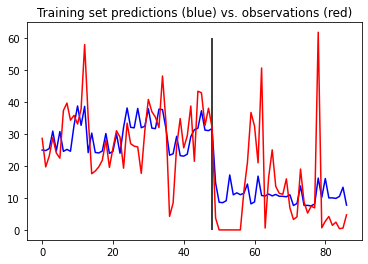

In [151]:
plt.figure
plt.plot(exes,preds,'b-')
plt.plot(exes,ttrain,'r-')
plt.vlines(np.sum(fmtrain[:,0]<68/118),0,60) #vertical line represents split between 'Early' and 'Late' data
plt.title('Training set predictions (blue) vs. observations (red)')
#Note the bias remains fairly high wrt to the outliers indicating that the amount of overtraining is probably not too high

In [152]:
preds=[]
for i in range(len(ttest)):
    preds.append((fmtest[i,:]@lstsq).astype(float))

Text(0.5, 1.0, 'Test set predictions (blue) vs. observations (red)')

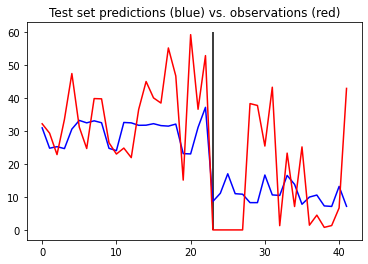

In [153]:
plt.figure
plt.plot(exes[:len(ttest)],preds,'b-') #40=len(ttest)
plt.plot(exes[:len(ttest)],ttest,'r-')
plt.vlines(np.sum(fmtest[:,0]<68/118),0,60) #vertical line represents split between 'Early' and 'Late' data
plt.title('Test set predictions (blue) vs. observations (red)')

In [154]:
#Ridge regression is a known means of dealing with multicollinearity. Can it improve our results here?
ridgeparams=[0,.001,.01,.1,.25,.333,.5,.75,1,2]
ttrainaug=np.vstack((ttrain,np.zeros(8).reshape(8,1))) #8=7 features plus an intercept term
RMSEs=[]
for k in ridgeparams:
    fmtrainaug=np.vstack((fmtrain,np.sqrt(k)*np.identity(8)))
    coeff=np.linalg.lstsq(fmtrainaug,ttrainaug)[0] #again taking advantage of NumPy's numerically stable algorithm
    RMSElosstest=np.sqrt(np.linalg.norm(fmtest@coeff-ttest)**2/fmtest.shape[0]) 
    RMSEs.append(RMSElosstest)

<ipython-input-154-210f8c27211e>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff=np.linalg.lstsq(fmtrainaug,ttrainaug)[0] #again taking advantage of NumPy's numerically stable algorithm


In [155]:
RMSEs #We get the lowest RMSE on the test set with no L2-regularization penalty (note that using a different training-test split
    #produced different results). 

[14.71958398086577,
 14.719699599938322,
 14.720740033092452,
 14.731139834074584,
 14.748516618547479,
 14.758179901694904,
 14.777751394581589,
 14.807372900952053,
 14.837333876694967,
 14.95918364880733]

In [156]:
#Compare our best results (RMSE=14.72 on the test set) to a baseline that minimizes RMSE by predicting the mean regardless of
#the feature data suggests the linear model gives about a 17% RMSE reduction vs. the baseline.

In [157]:
pred=np.mean(ttest)

In [158]:
np.sqrt(((np.linalg.norm(ttest-pred))**2)/len(ttest))

17.665916838754608

In [159]:
np.max(np.abs(ttest-fmtest@lstsq)) #maximum absolute deviation

36.201544938366546

In [160]:
#Although there are some gross errors in the estimation, linear regression using the features used here provides a  
#marginal improvement over baseline suggesting some predictive value.

In [161]:
#Since all the input data was standardized in the [0,1] range, the coefficients for linear regression can (with caution) be 
#interpreted as measures of the relative importance of the data for predicting clemency.

In [162]:
lstsq

array([[-3.66728932],
       [ 5.49140589],
       [-0.520513  ],
       [-0.64840682],
       [19.79531256],
       [11.57429046],
       [-2.59051004],
       [13.94122135]])

In [163]:
#It seems clemency was considerably more likely to be granted in fiscal years corresponding to presidential elections; that Democrats
#were more likely to grant clemency, especially in the early years; and that presidents of
#both parties were much more likely to grant clemency prior to 1967.

In [164]:
#What if we want to consider a different target variable: the percentage of petitions granted that were pardons?

In [165]:
pctpardons1=p1['Pardons']/p1['Petitions Granted']

In [166]:
pctpardons2=p2['Pardons']/p2['Petitions Granted']

In [167]:
#Some of the values are NaN because there were no petitions granted (pardons or otherwise) in that particular year. Imputing the
#mean gives an agnostic approach to whether any hypothetical petition that was granted would have been a pardon. 

In [168]:
pctpardons1=pctpardons1.replace(np.nan,np.mean(pctpardons1))
pctpardons2=pctpardons2.replace(np.nan,np.mean(pctpardons2))

In [169]:
pctpardons1=100*pctpardons1

In [170]:
pctpardons2=100*pctpardons2

In [171]:
target=np.vstack((pctpardons1.to_numpy().reshape(71,1),pctpardons2.to_numpy().reshape(58,1)))

In [172]:
target.shape

(129, 1)

In [173]:
#Perhaps a new date split is warranted

In [174]:
STDsums=[]
split=0
while split<117:
    subset1=target[X['Fiscal Year']<split+1900.5]
    subset2=target[X['Fiscal Year']>split+1900.5]
    STDsums.append(np.std(subset1)*np.size(subset1)/129+np.std(subset2)*np.size(subset2)/129)
    split+=1

In [175]:
np.argmin(STDsums)

38

In [176]:
#In fact we find a better split at 1938

In [177]:
np.std(target)

23.43581851954986

In [178]:
np.std(target[X['Fiscal Year']<1938.5])

11.524745361482188

In [179]:
np.std(target[X['Fiscal Year']>1938.5])

18.92924128230686

In [180]:
#Again checking whether a further split seems desirable

In [181]:
newtarget=target[X['Fiscal Year']>1938.5]
newX=X[X['Fiscal Year']>1938.5]

In [182]:
STDsums=[]
split=0
while split<79:
    subset1=newtarget[newX['Fiscal Year']<split+1938.5]
    subset2=newtarget[newX['Fiscal Year']>split+1938.5]
    STDsums.append(np.std(subset1)*np.size(subset1)/np.size(newtarget)+np.std(subset2)*np.size(subset2)/np.size(newtarget))
    split+=1

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [183]:
np.argmin(STDsums)

0

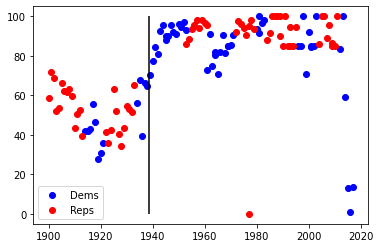

In [184]:
plt.scatter(X.loc[X['Dem']]['Fiscal Year'],target[X['Dem']==True],c='b',label='Dems')
plt.scatter(X.loc[X['Dem']==False]['Fiscal Year'],target[X['Dem']==False],c='r',label='Reps')
plt.vlines(1938.5,0,100) #splitting into 'early' and 'late' data
plt.legend(loc='lower left')

In [185]:
#It seems to make sense (and is easy) to use the same 4-way classification scheme as before, just with a different year for the 
#splitting point

In [186]:
X['Early']=X['Fiscal Year']<1938.5

In [187]:
X['EarlyDem']=X['Dem'] & X['Early']
X['LateRep']=(X['Dem'] | X['Early'])==False
X['EarlyRep']=X['Early'] > X['Dem']
X['LateDem']=X['Dem'] > X['Early']

In [188]:
X[35:45]

,Fiscal Year,%Granted,Early,y0,y1,y2,y3,President,Dem,EarlyDem,LateRep,EarlyRep,LateDem
35,1935,24.840256,True,False,False,False,True,Franklin D. Roosevelt,True,True,False,False,False
36,1936,33.333333,True,True,False,False,False,Franklin D. Roosevelt,True,True,False,False,False
37,1937,26.919519,True,False,True,False,False,Franklin D. Roosevelt,True,True,False,False,False
38,1938,26.157407,True,False,False,True,False,Franklin D. Roosevelt,True,True,False,False,False
39,1939,21.942446,False,False,False,False,True,Franklin D. Roosevelt,True,False,False,False,True
40,1940,25.910596,False,True,False,False,False,Franklin D. Roosevelt,True,False,False,False,True
41,1941,17.656904,False,False,True,False,False,Franklin D. Roosevelt,True,False,False,False,True
42,1942,36.566440,False,False,False,True,False,Franklin D. Roosevelt,True,False,False,False,True
43,1943,30.895009,False,False,False,False,True,Franklin D. Roosevelt,True,False,False,False,True
44,1944,40.733945,False,True,False,False,False,Franklin D. Roosevelt,True,False,False,False,True


In [189]:
X[70:80]

,Fiscal Year,%Granted,Early,y0,y1,y2,y3,President,Dem,EarlyDem,LateRep,EarlyRep,LateDem
70,1966,38.001708,False,False,False,True,False,Lyndon B. Johnson,True,False,False,False,True
71,1967,32.026144,False,False,False,False,True,Lyndon B. Johnson,True,False,False,False,True
72,1968,3.712297,False,True,False,False,False,Lyndon B. Johnson,True,False,False,False,True
73,1969,0.000000,False,False,True,False,False,Lyndon B. Johnson,True,False,False,False,True
74,1969,0.000000,False,False,True,False,False,Lyndon B. Johnson,True,False,False,False,True
75,1970,0.000000,False,False,False,True,False,Lyndon B. Johnson,True,False,False,False,True
76,1971,0.000000,False,False,False,False,True,Lyndon B. Johnson,True,False,False,False,True
77,1972,0.000000,False,True,False,False,False,Richard M. Nixon,False,False,True,False,False
78,1973,0.000000,False,False,True,False,False,Richard M. Nixon,False,False,True,False,False
79,1974,0.000000,False,False,False,True,False,Richard M. Nixon,False,False,True,False,False


In [190]:
feature_matrix[:,4]=X['EarlyDem'].to_numpy().astype(int)
feature_matrix[:,5]=X['EarlyRep'].to_numpy().astype(int)
feature_matrix[:,6]=X['LateDem'].to_numpy().astype(int)

In [191]:
i=1
while i<7:
    print(np.corrcoef(feature_matrix[:,0],feature_matrix[:,i]))
    i=i+1

[[ 1.         -0.03103076]
 [-0.03103076  1.        ]]
[[1.         0.07339082]
 [0.07339082 1.        ]]
[[ 1.         -0.03282794]
 [-0.03282794  1.        ]]
[[ 1.         -0.35457748]
 [-0.35457748  1.        ]]
[[ 1.         -0.65868997]
 [-0.65868997  1.        ]]
[[1.         0.30712455]
 [0.30712455 1.        ]]


In [192]:
#Again we see the expected high-magnitude correlations between the (standardized) fiscal year and the categorizations that include
#early/late, with no correlation unacceptably high

In [193]:
np.linalg.cond(feature_matrix) #This matrix is also well-conditioned despite the mutual information in the columns and the
                            #many similar rows

12.305554992392862

In [194]:
u,s,v=np.linalg.svd(feature_matrix.T@feature_matrix) #checking for the tell-tale small singular values

In [195]:
s

array([220.30765987,  37.90887466,  35.37574061,  29.97081227,
        18.3965374 ,  11.97968467,   6.48573004,   1.45488004])

In [196]:
fmtrain=feature_matrix[randvec[:,0]<.7]
fmtest=feature_matrix[randvec[:,0]>=.7]
ttrain=target[randvec[:,0]<.7]
ttest=target[randvec[:,0]>=.7]

In [197]:
lstsq=np.linalg.lstsq(fmtrain,ttrain)[0] #using the original feature matrix, with splitting point after 1938 rather than 1967

<ipython-input-197-710f1491b121>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  lstsq=np.linalg.lstsq(fmtrain,ttrain)[0] #using the original feature matrix, with splitting point after 1938 rather than 1967


In [198]:
np.linalg.norm(fmtrain@lstsq-ttrain)

103.05806227048362

In [199]:
np.linalg.norm(fmtest@lstsq-ttest)

152.80240909055223

In [200]:
RMSElosstrain=np.sqrt(np.linalg.norm(fmtrain@lstsq-ttrain)**2/fmtrain.shape[0])
RMSElosstrain

11.04898403762795

In [201]:
RMSElosstest=np.sqrt(np.linalg.norm(fmtest@lstsq-ttest)**2/fmtest.shape[0])
RMSElosstest

23.577923604950215

In [202]:
#Trying out ridge regularization
ridgeparams=[0,.001,.01,.1,.25,.333,.5,.75,1,2]
ttrainaug=np.vstack((ttrain,np.zeros(8).reshape(8,1)))
RMSEs=[]
for k in ridgeparams:
    fmtrainaug=np.vstack((fmtrain,np.sqrt(k)*np.identity(8)))
    coeff=np.linalg.lstsq(fmtrainaug,ttrainaug)[0] #again taking advantage of NumPy's numerically stable algorithm
    RMSElosstest=np.sqrt(np.linalg.norm(fmtest@coeff-ttest)/fmtest.shape[0]) 
    RMSEs.append(RMSElosstest)

<ipython-input-202-e006c5db983f>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff=np.linalg.lstsq(fmtrainaug,ttrainaug)[0] #again taking advantage of NumPy's numerically stable algorithm


In [203]:
RMSEs

[1.9073941903534508,
 1.9074944657271073,
 1.9083984318517968,
 1.9174472897414236,
 1.9317291728317214,
 1.9389332901541176,
 1.95179753550941,
 1.9673916732726853,
 1.979497192770017,
 2.0077033203111574]

In [204]:
#Again we see no advantage from L2 regularization.

In [205]:
#Best results (no regularization)
preds=[]
for i in range(len(ttrain)):
    preds.append((fmtrain[i,:]@lstsq).astype(float))

Text(0.5, 1.0, 'Training set predictions (blue) vs. observations (red)')

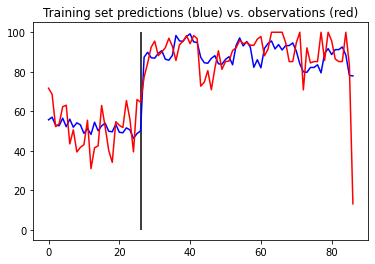

In [206]:
plt.figure
plt.plot(exes,preds,'b-')
plt.plot(exes,ttrain,'r-')
plt.vlines(np.sum(fmtrain[:,0]<39/118),0,100) #vertical line represents split between 'Early' and 'Late' data
plt.title('Training set predictions (blue) vs. observations (red)')

In [207]:
preds=[]
for i in range(len(ttest)):
    preds.append((fmtest[i,:]@lstsq).astype(float))

Text(0.5, 1.0, 'Test set predictions (blue) vs. observations (red)')

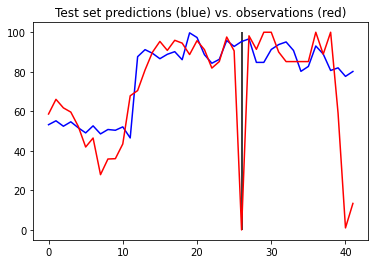

In [209]:
exes=exes[:len(ttest)]
plt.figure
plt.plot(exes,preds,'b-')
plt.plot(exes,ttest,'r-')
plt.vlines(np.sum(fmtrain[:,0]<39/118),0,100) #vertical line represents split between 'Early' and 'Late' data
plt.title('Test set predictions (blue) vs. observations (red)')

In [210]:
RMSElosstest=np.sqrt(np.linalg.norm(fmtest@coeff-ttest)**2/fmtest.shape[0]) #RMSE using best linear model
RMSElosstest

26.123040254010817

In [211]:
pred=np.mean(ttest) #baseline RMSE using mean
np.sqrt(((np.linalg.norm(ttest-pred))**2)/len(ttest))

27.58674186198483

In [213]:
#It seems we get about a 5% improvement using linear regression in this case.

In [214]:
lstsq

array([[-15.08291734],
       [ -0.12431385],
       [  2.48107957],
       [  3.94062586],
       [-51.65719046],
       [-49.30439741],
       [-10.03507587],
       [102.78515885]])

In [215]:
#It appears that presidents before 1938 had a much higher ratio of other forms of clemency to pardons.